In [2]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.10.0


In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
%pip install seaborn
%pip install nltk


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# import pandas as pd
# import numpy as np
# import re
# import nltk
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.manifold import TSNE
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# import gensim

# # Download stopwords
# nltk.download('stopwords')
# from nltk.corpus import stopwords

# # Load the datasets
# true_news = pd.read_csv('True.csv')
# fake_news = pd.read_csv('Fake.csv')

# # Add labels
# true_news['label'] = 1
# fake_news['label'] = 0

# # Concatenate the datasets
# data = pd.concat([true_news, fake_news], ignore_index=True)

# # Shuffle the data
# data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# # Preprocessing: remove unnecessary columns (date, subject)
# data = data.drop(['date', 'subject'], axis=1)

# # Function to clean text
# def preprocess_text(text):
#     text = text.lower()  # Lowercase
#     text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters and numbers
#     stop_words = set(stopwords.words('english'))
#     text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
#     return text

# # Apply preprocessing to title and text
# data['title'] = data['title'].apply(preprocess_text)
# data['text'] = data['text'].apply(preprocess_text)

# # Create 'combined_text' by concatenating title and text
# data['combined_text'] = data['title'] + ' ' + data['text']

# # Tokenization settings
# max_words = 10000  # Limit vocabulary size
# tokenizer = Tokenizer(num_words=max_words)

# # Fit the tokenizer on combined text and convert it to sequences
# tokenizer.fit_on_texts(data['combined_text'])
# sequences = tokenizer.texts_to_sequences(data['combined_text'])

# # Visualize the distribution of token lengths
# token_lengths = [len(seq) for seq in sequences]
# plt.hist(token_lengths, bins=50, color='blue', edgecolor='black')
# plt.title('Distribution of Token Lengths')
# plt.xlabel('Token Length')
# plt.ylabel('Frequency')
# plt.show()

# # Set max_len for padding
# max_len = 500  # You can adjust this based on the token length distribution

# # Pad the sequences
# padded_sequences = pad_sequences(sequences, maxlen=max_len)

# # Visualize the first 5 padded sequences as a heatmap
# plt.figure(figsize=(10, 5))
# sns.heatmap(padded_sequences[:5], cmap='Blues', annot=False, cbar=False)
# plt.title('Padded Sequences Heatmap (First 5 Sequences)')
# plt.show()

# # Load the pre-trained Google Word2Vec model (ensure you have the GoogleNews-vectors-negative300.bin)
# word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

# # Prepare the embedding matrix
# embedding_dim = 300  # Google Word2Vec model has 300-dimensional embeddings
# embedding_matrix = np.zeros((max_words, embedding_dim))

# # Map the words from tokenizer's vocabulary to Word2Vec embeddings
# for word, i in tokenizer.word_index.items():
#     if i < max_words:
#         try:
#             embedding_vector = word2vec_model[word]
#             if embedding_vector is not None:
#                 embedding_matrix[i] = embedding_vector
#         except KeyError:
#             # Word not found in Word2Vec, leave the embedding as all zeros
#             pass

# # Use t-SNE to visualize embeddings in 2D
# tsne = TSNE(n_components=2, random_state=42)
# embedding_2d = tsne.fit_transform(embedding_matrix[:500])  # Visualizing the first 500 words

# # Plot t-SNE result
# plt.figure(figsize=(10, 6))
# plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], c='blue', edgecolors='k', s=50)
# plt.title('Word Embeddings Visualized using t-SNE')
# plt.show()


In [6]:
# 

In [7]:
%pip install imblearn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import gensim

In [9]:

# Load the datasets
true_news = pd.read_csv('Dataset/real_stances.csv')
fake_news = pd.read_csv('Dataset/fake_stances.csv')

# Add labels
true_news['label'] = 1 
fake_news['label'] = 0
print(true_news.head())
print(fake_news.head())

                                            Headline  Body ID  label
0  Hundreds of Palestinians flee floods in Gaza a...      158      1
1  'Nasa Confirms Earth Will Experience 6 Days of...      154      1
2  Banksy 'Arrested & Real Identity Revealed' Is ...     1739      1
3                                     Gateway Pundit     2327      1
4  Woman detained in Lebanon is not al-Baghdadi's...     1468      1
                                            Headline  Body ID  label
0  Police find mass graves with at least '15 bodi...      712      0
1  Christian Bale passes on role of Steve Jobs, a...      137      0
2  HBO and Apple in Talks for $15/Month Apple TV ...     1034      0
3  Spider burrowed through tourist's stomach and ...     1923      0
4  Accused Boston Marathon Bomber Severely Injure...      962      0


In [10]:
# # Concatenate the datasets
# data = pd.concat([true_news, fake_news], ignore_index=True)
# print(data.info())
data=pd.read_csv('Dataset/merged1.csv')
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49972 entries, 0 to 49971
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headline     49972 non-null  object
 1   Body ID      49972 non-null  int64 
 2   articleBody  49972 non-null  object
 3   label        49972 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.5+ MB
None


In [11]:
# import pandas as pd
# 
# Assuming 'data' is your DataFrame
# Reorder the columns
# data = data[['Headline', 'Body ID', 'articleBody', 'label']]

# data.to_csv('merged1.csv')
# Display the updated DataFrame
# print(data.head())

# data=pd.read_csv('merged1.csv')



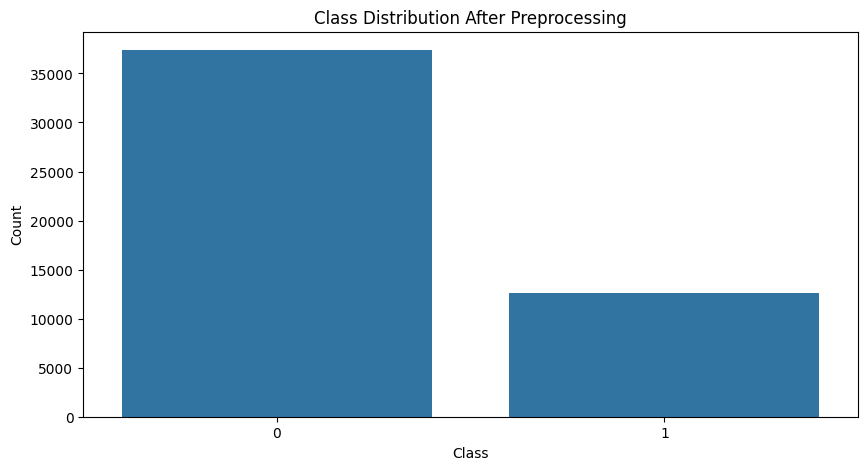

In [12]:

# Drop unnecessary columns
# data = data.drop(['date', 'subject'], axis=1)
data = data.drop(['Body ID'], axis=1)

# Shuffle the data
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Function to clean text
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters and numbers
    return text

# Apply preprocessing to title and text
data['Headline'] = data['Headline'].apply(preprocess_text)
data['articleBody'] = data['articleBody'].apply(preprocess_text)

# Create 'combined_text'
data['combined_text'] = data['Headline'] + ' ' + data['articleBody']

# Visualize class distribution after preprocessing
plt.figure(figsize=(10, 5))
sns.countplot(x='label', data=data)
plt.title('Class Distribution After Preprocessing')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Vocabulary size: 25122
Example tokenized sequence: [42, 130, 3732, 1242, 550, 102, 552, 25, 2046, 40, 145, 736, 1676, 17, 27, 6770, 5, 2, 8458, 3, 524, 156, 1934, 22, 3, 1499, 773, 582, 14, 3, 2028, 2701, 14, 16, 1761, 8981, 5534, 108, 755, 94, 1255, 138, 1, 146, 37, 13, 9, 892, 3384, 2, 3, 5193, 450, 4020, 773, 5, 741, 1, 1430, 1999, 20, 755, 1012, 4, 1565, 286, 37, 6186, 6, 7774, 2516, 9529, 6424, 898, 39, 1241, 3, 1018, 11, 1, 2275, 12, 15, 20, 755, 762, 4, 955, 21, 321, 4, 1, 207, 2136, 1241, 3, 58, 249, 1, 2504, 27, 5296, 127, 1, 4619, 60, 193, 917, 31, 73, 1676, 2, 260, 65, 10, 34, 387, 2054, 2, 140, 7, 1447, 4, 1380, 1, 12, 524, 1934, 22, 1499, 773, 14, 2028, 555, 4, 1761, 9530, 9531, 1430, 1999, 5448, 668, 524, 1934, 22, 1499, 773, 14, 2028, 555, 4, 1761, 9530, 9531, 15, 675, 3, 8138, 966, 2, 666, 3, 524, 22, 3, 773, 101, 7, 28, 1929, 7, 148, 3148, 26, 78, 2117, 5483, 6, 3005, 278, 100, 9529, 6424, 668, 15, 675, 3, 8138, 966, 2, 666, 3, 524, 22, 3, 773, 101, 7, 28, 1929, 7, 148

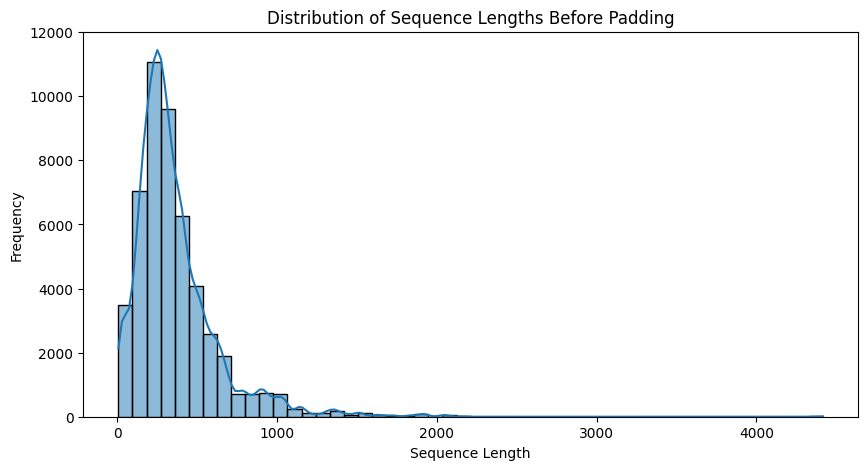

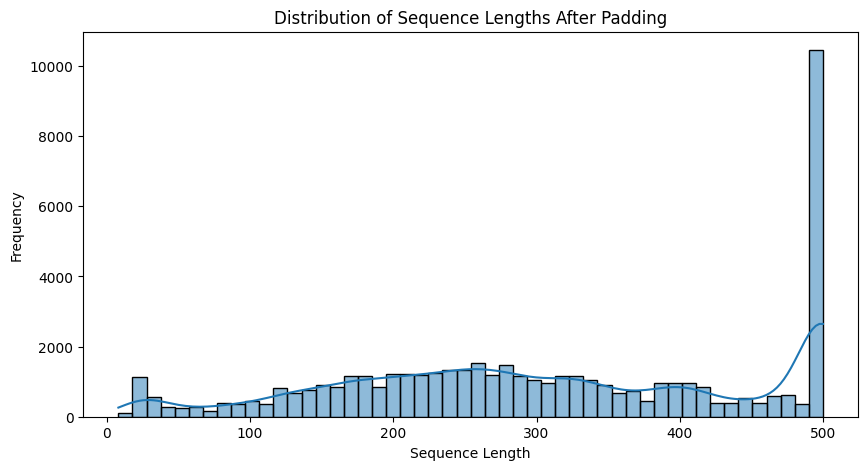

In [13]:
# Tokenization settings
max_words = 10000  # Limit vocabulary size
tokenizer = Tokenizer(num_words=max_words)

# Fit the tokenizer on combined text and convert it to sequences
tokenizer.fit_on_texts(data['combined_text'])
sequences = tokenizer.texts_to_sequences(data['combined_text'])

# Visualize tokenizer results
word_index = tokenizer.word_index
print(f"Vocabulary size: {len(word_index)}")

# Example of tokenized sequences
print(f"Example tokenized sequence: {sequences[0]}")

# Pad the sequences
max_len = 500  # Adjust based on your distribution
padded_sequences = pad_sequences(sequences, maxlen=max_len)

# Visualize the padded sequences
print(f"Padded sequences shape: {padded_sequences.shape}")

# Plot distribution of sequence lengths
plt.figure(figsize=(10, 5))
sequence_lengths = [len(seq) for seq in sequences]
sns.histplot(sequence_lengths, bins=50, kde=True)
plt.title('Distribution of Sequence Lengths Before Padding')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
padded_sequence_lengths = np.sum(padded_sequences != 0, axis=1)
sns.histplot(padded_sequence_lengths, bins=50, kde=True)
plt.title('Distribution of Sequence Lengths After Padding')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.show()

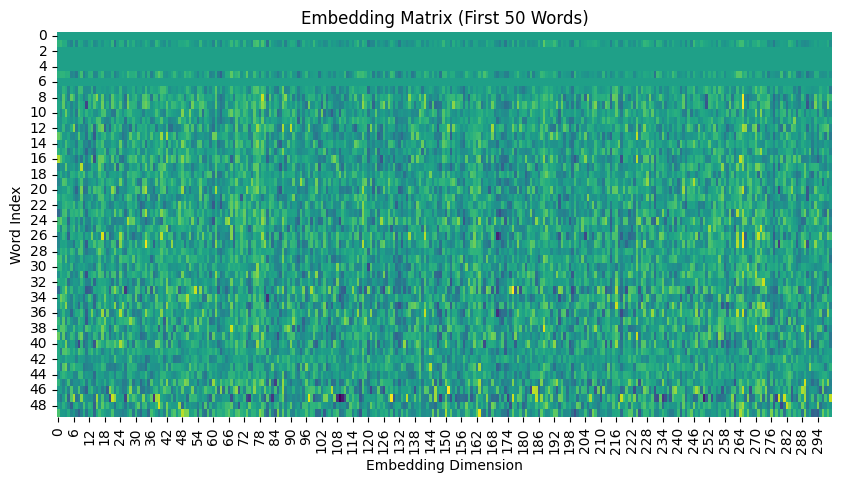

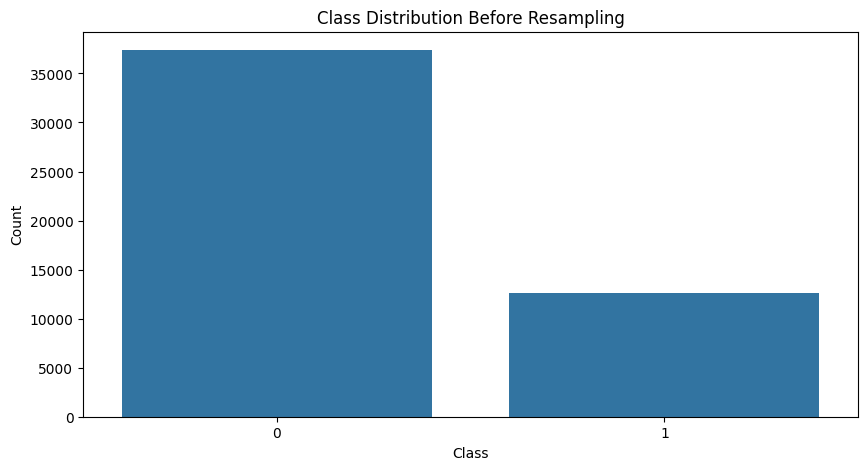

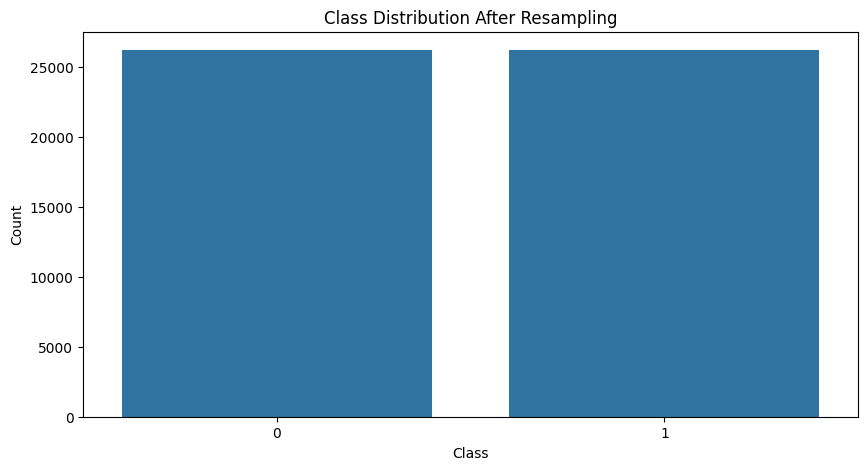

In [14]:

# Load Google Word2Vec model
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

# Create embedding matrix
embedding_dim = 300
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < max_words:
        try:
            embedding_vector = word2vec_model[word]
            embedding_matrix[i] = embedding_vector
        except KeyError:
            # Word not in Word2Vec model
            continue

# Visualize the embedding matrix
plt.figure(figsize=(10, 5))
sns.heatmap(embedding_matrix[:50], cmap='viridis', cbar=False)
plt.title('Embedding Matrix (First 50 Words)')
plt.xlabel('Embedding Dimension')
plt.ylabel('Word Index')
plt.show()

# Check and visualize class distribution before resampling
plt.figure(figsize=(10, 5))
sns.countplot(x='label', data=data)
plt.title('Class Distribution Before Resampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Split the data into features and labels
X = padded_sequences
y = data['label'].values

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply resampling to the training set
smote = SMOTE(sampling_strategy='minority')
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Visualize class distribution after resampling
plt.figure(figsize=(10, 5))
sns.countplot(x=y_train_resampled)
plt.title('Class Distribution After Resampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


# test data wr resampling?
# validation train wr
# epochs, dim?

In [15]:
%pip install joblib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import joblib
np.save('padded_sequences.npy', padded_sequences)
joblib.dump(tokenizer, 'tokenizer.pkl')

['tokenizer.pkl']

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout

# Define the model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, weights=[embedding_matrix], trainable=False, input_length=max_len))
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 300)          3000000   
                                                                 
 bidirectional (Bidirectiona  (None, 500, 200)         320800    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 500, 200)          0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 200)              240800    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense (Dense)               (None, 1)                 2

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define a callback to save the best model
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min')

# Train the model
history = model.fit(
    X_train_resampled, y_train_resampled,
    epochs=50,  # Adjust as needed
    batch_size=64,  # Adjust as needed
    validation_data=(X_test, y_test),
    callbacks=[checkpoint]
)


Epoch 1/50
819/819 [==============================] - 466s 534ms/step - loss: 0.5765 - accuracy: 0.6908 - val_loss: 0.4926 - val_accuracy: 0.7693
Epoch 2/50
819/819 [==============================] - 624s 762ms/step - loss: 0.4797 - accuracy: 0.7670 - val_loss: 0.4574 - val_accuracy: 0.7868
Epoch 3/50
819/819 [==============================] - 594s 725ms/step - loss: 0.4482 - accuracy: 0.7839 - val_loss: 0.4488 - val_accuracy: 0.7928
Epoch 4/50
819/819 [==============================] - 475s 580ms/step - loss: 0.4318 - accuracy: 0.7907 - val_loss: 0.4658 - val_accuracy: 0.7884
Epoch 5/50
819/819 [==============================] - 208s 254ms/step - loss: 0.4190 - accuracy: 0.7960 - val_loss: 0.4606 - val_accuracy: 0.7848
Epoch 6/50
819/819 [==============================] - 208s 254ms/step - loss: 0.4237 - accuracy: 0.7950 - val_loss: 0.4293 - val_accuracy: 0.8060
Epoch 7/50
819/819 [==============================] - 225s 274ms/step - loss: 0.4131 - accuracy: 0.7989 - val_loss: 0.4694 -

In [20]:
# Load the best model
best_model = tf.keras.models.load_model('best_model.h5')

# Evaluate the model
loss, accuracy = best_model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Predict on the test set
y_pred = (best_model.predict(X_test) > 0.5).astype("int32")

# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)


469/469 [==============================] - 41s 79ms/step - loss: 0.2314 - accuracy: 0.9015
Test Loss: 0.23140300810337067
Test Accuracy: 0.9014807939529419
469/469 [==============================] - 37s 76ms/step
Confusion Matrix:
[[10249   947]
 [  530  3266]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93     11196
           1       0.78      0.86      0.82      3796

    accuracy                           0.90     14992
   macro avg       0.86      0.89      0.87     14992
weighted avg       0.91      0.90      0.90     14992



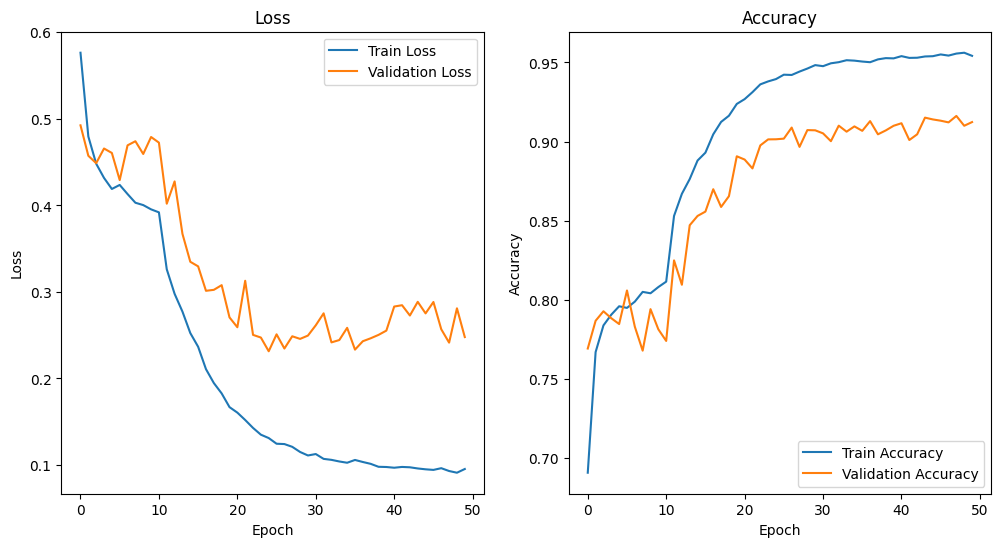

In [21]:
# Plot training history
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
